## House Price Prediction using Linear, Ridge and Lasso Regression

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

## Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import os
import sys

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



%matplotlib inline

In [171]:
# reading the dataset
h_p = pd.read_csv("train.csv")
h_p.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [172]:
h_p.shape

(1460, 81)

In [173]:
# summary of the dataset: 1460 rows, 81 columns
print(h_p.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [174]:
h_p.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [175]:
# head
h_p.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [176]:
# To check na in the column 
h_p.loc[:, h_p.isnull().any()].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [177]:
#check missing percentage
cent_miss = (h_p.isnull().sum() / h_p.isnull().count()*100).sort_values(ascending = False)
print(cent_miss)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [178]:
#As we can see PoolQc, MiscFeature, Alley, Fence and FireplaceQu have more than 40% na values, hence dropping these
h_p.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu', 'LotFrontage'],axis=1,inplace=True)
#Id is not required for anlaysis so removing it
h_p.drop(['Id'],axis=1,inplace=True)
h_p.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Exploratory Data Analysis

In [179]:
#Checking the categorical and numerical columns
Num_col = []
Cat_col = []
for i in h_p.columns:
    if h_p[i].dtypes != 'object':
        Num_col.append(i)
    else:
        Cat_col.append(i)
print(len(Num_col), '-> numerical columns')
print(len(Cat_col), '-> categorical columns')

36 -> numerical columns
38 -> categorical columns


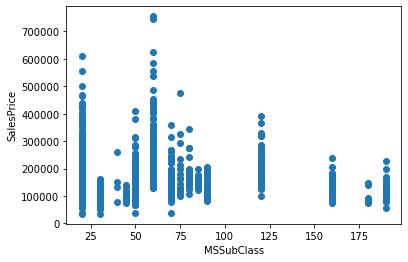

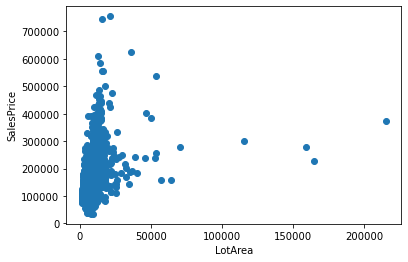

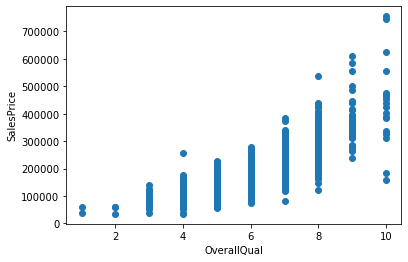

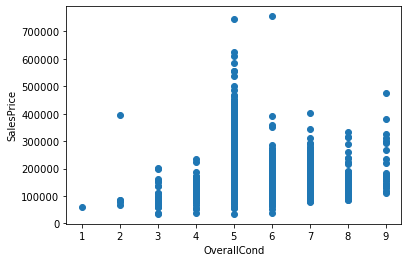

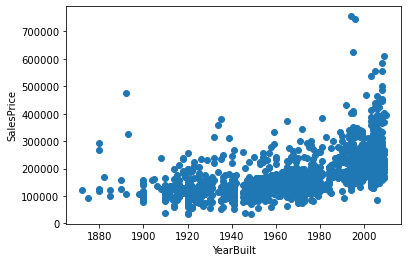

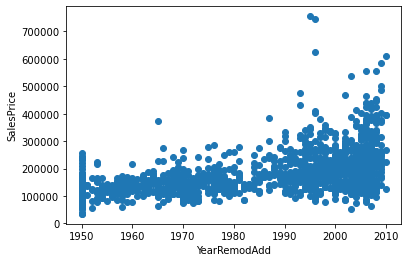

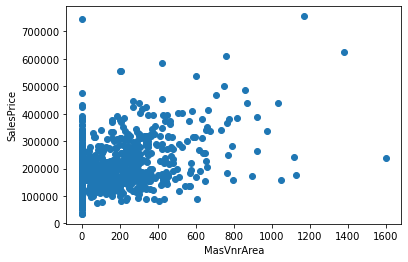

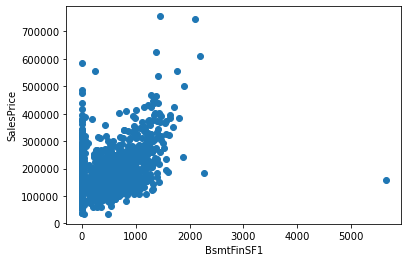

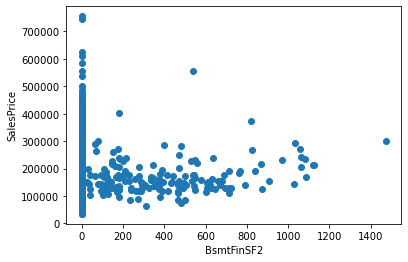

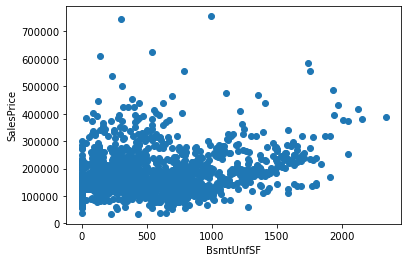

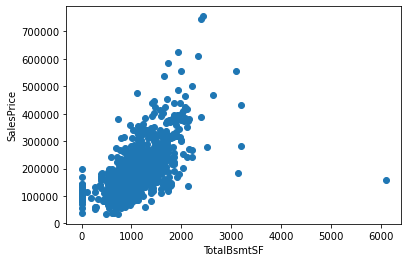

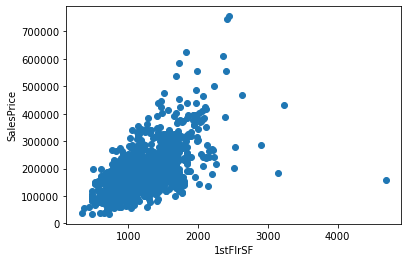

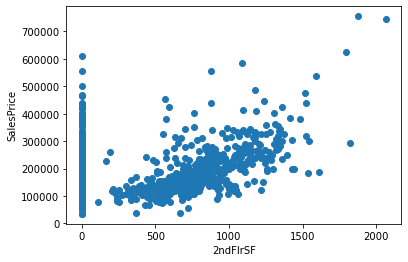

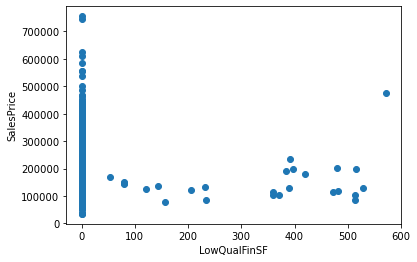

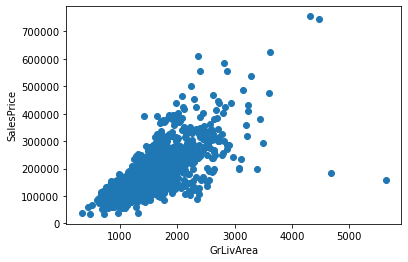

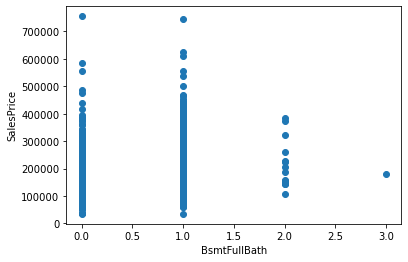

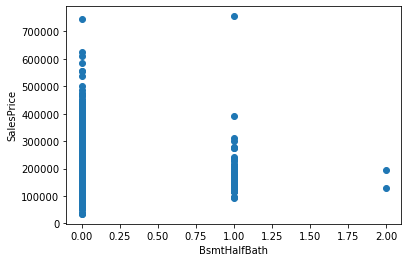

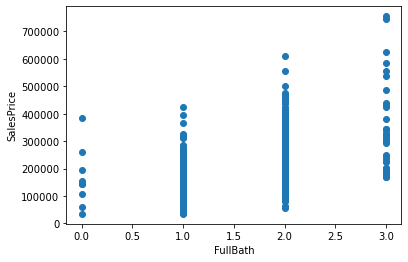

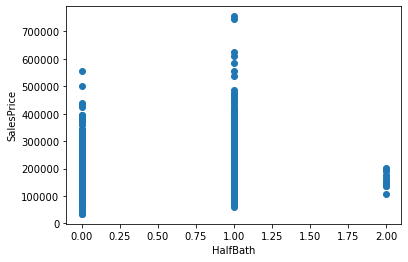

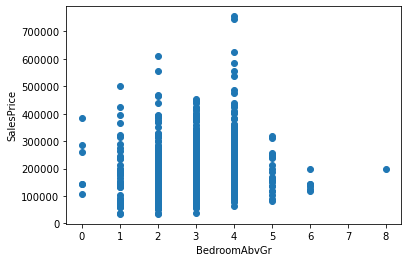

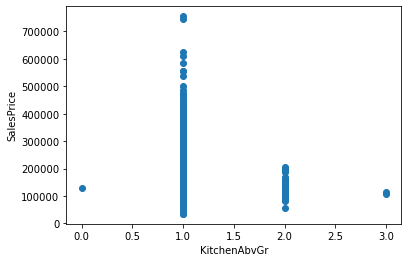

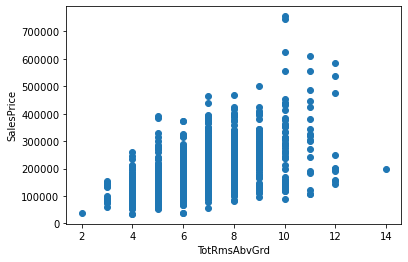

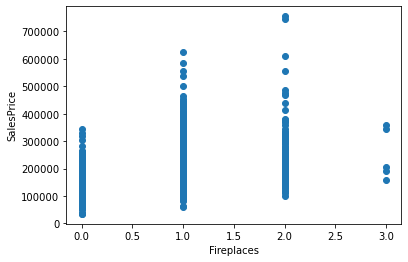

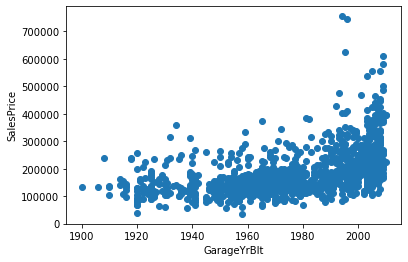

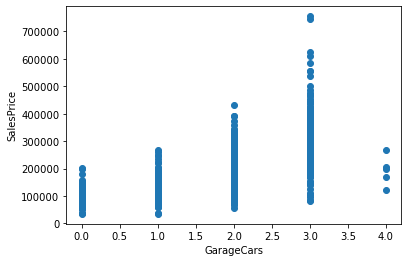

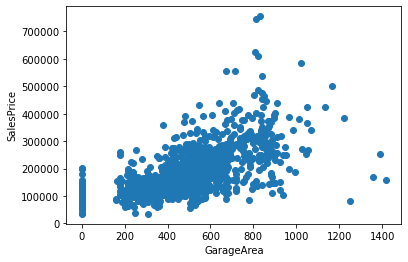

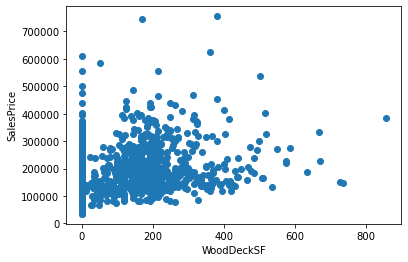

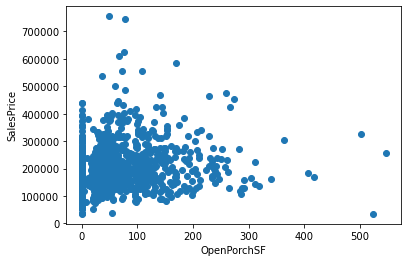

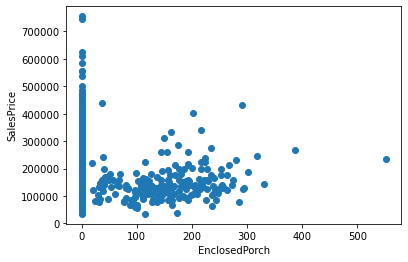

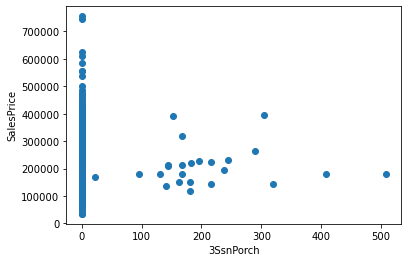

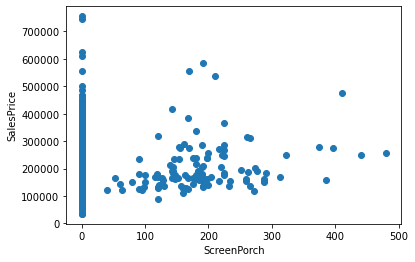

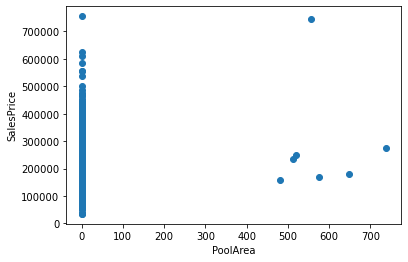

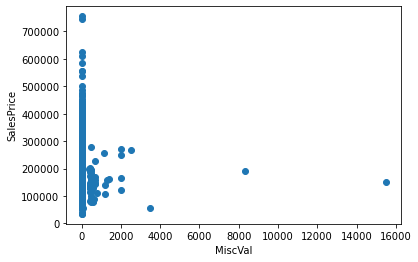

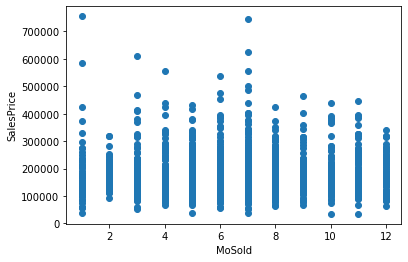

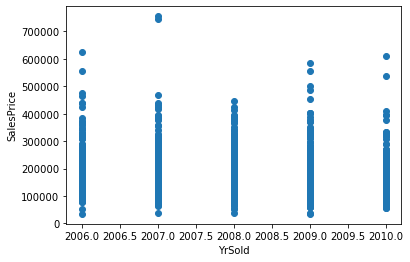

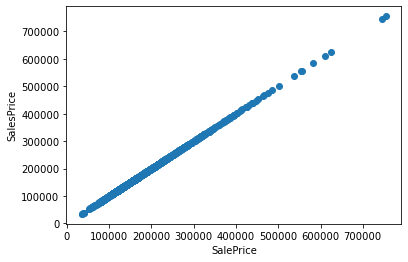

In [180]:
analysis = h_p.copy()

for feature in Num_col:
    plt.scatter(analysis[feature],analysis['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.show()

The conclusions from above plots are:
- Newly built houses are costlier than old houses
- YrSold has no much impact on Sales Price of the house
- Number of Garagecars is directly propotional to sales price of the house
- GrLivArea had direct impact on sales price of house
- Average condition houses have higher slae price

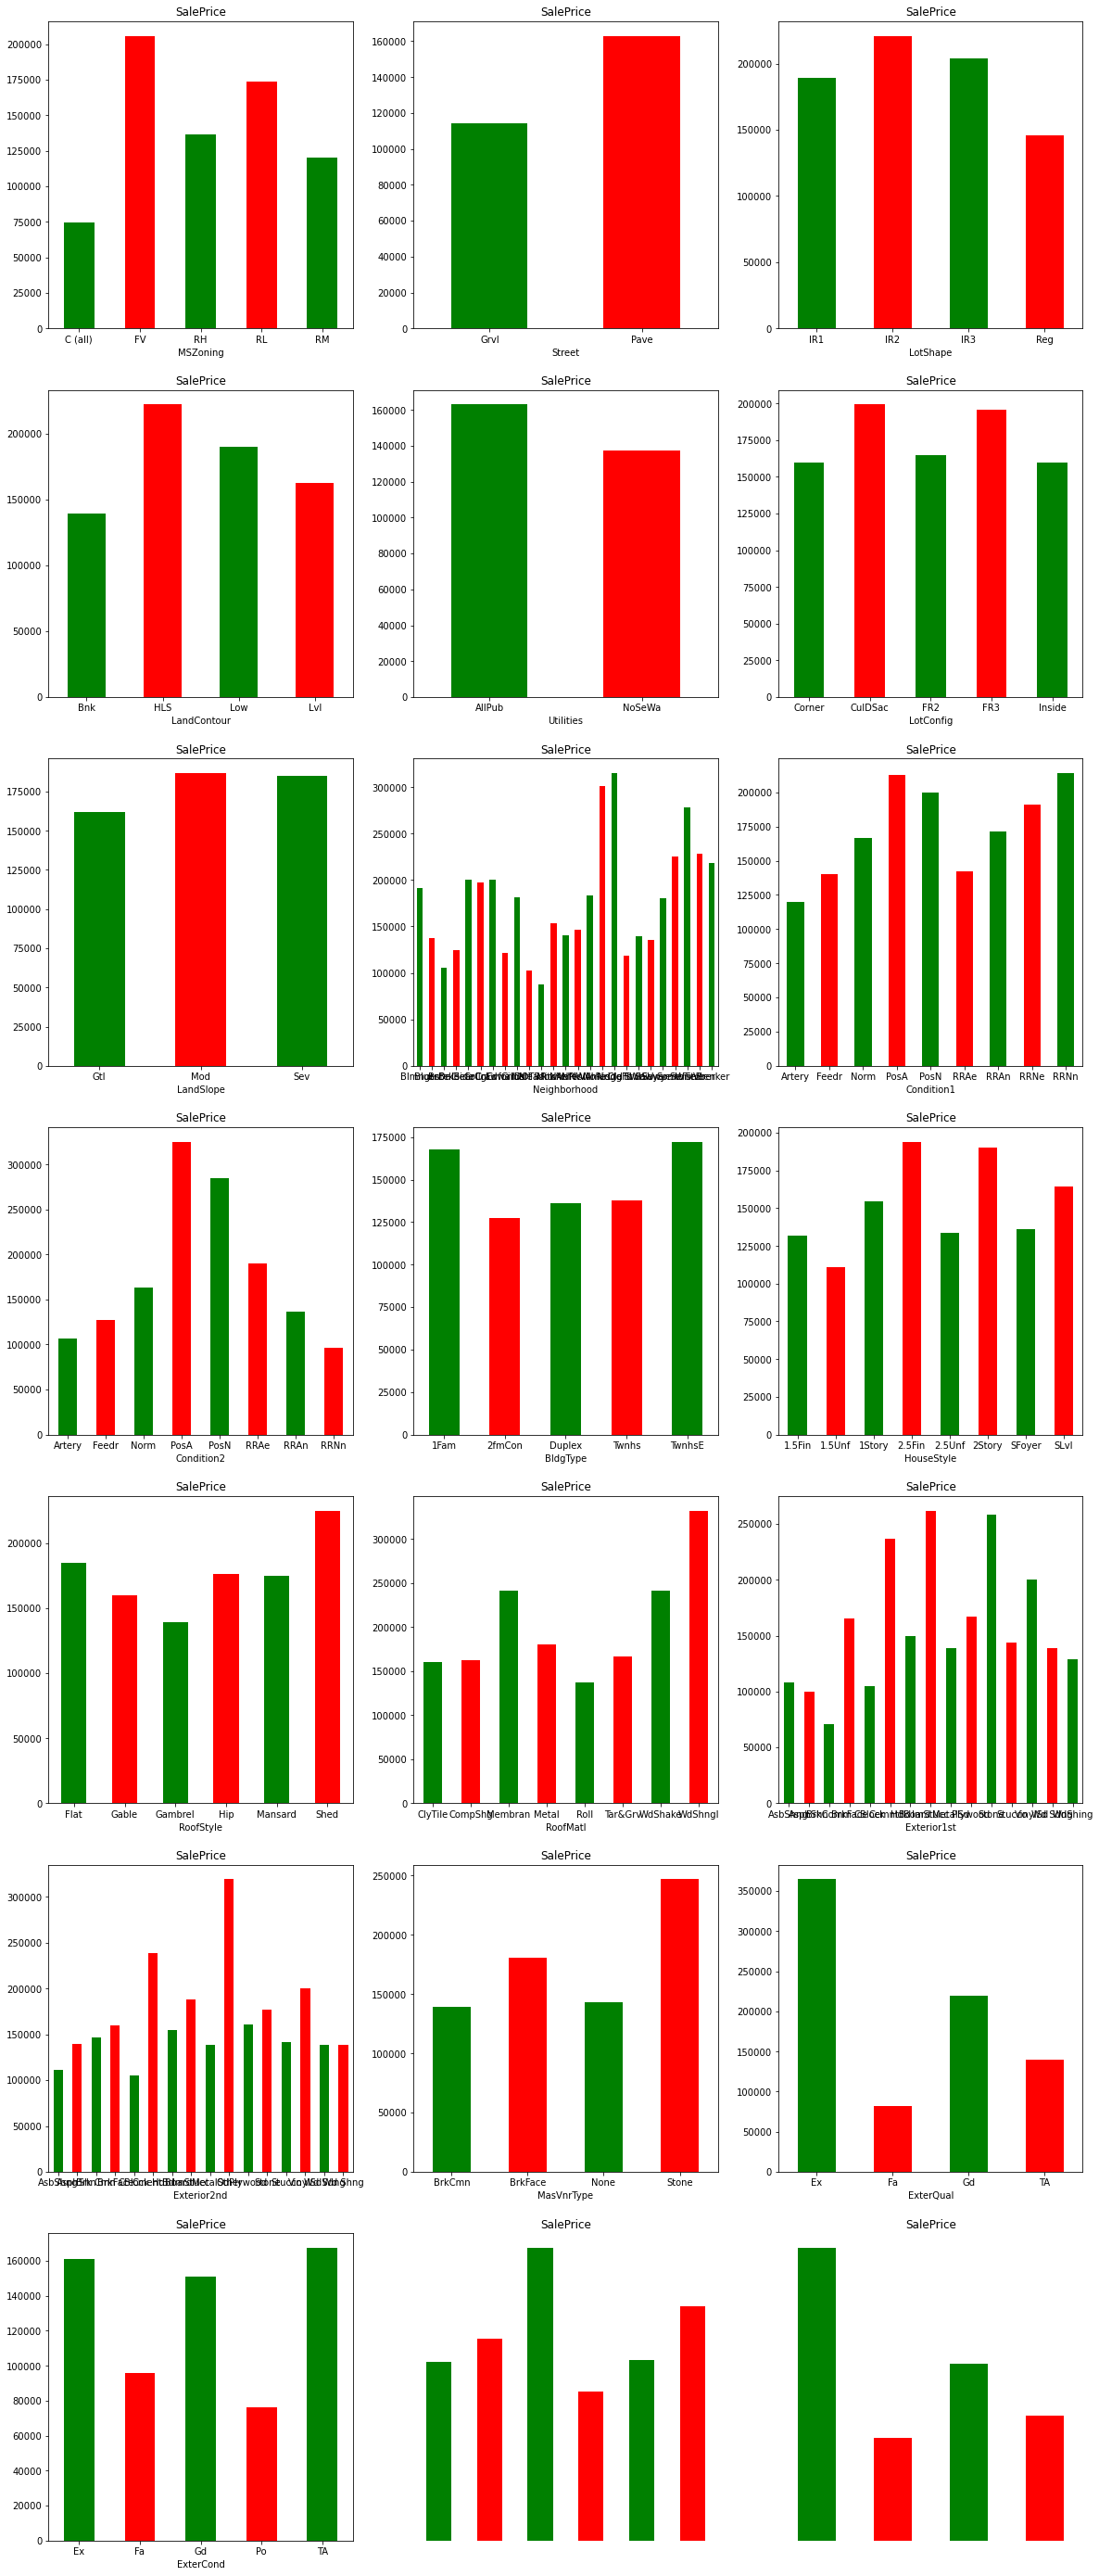

In [181]:
fig,axs= plt.subplots(7,3,figsize=(20,50),squeeze=True)
for i,ax in zip(Cat_col,axs.flatten()):    
    analysis.groupby(i)['SalePrice'].median().plot.bar(color = list('gr'),rot=0,ax=ax,subplots=True)
axs[6,1].set_axis_off()    
axs[6,2].set_axis_off() 
plt.show()

Following are conclusions from above bar graphs:
- Building type have higer impact on sale price
- Housestyle 2.5fn and 2 story have higer sale price
- Lotshape, landslope and utilities have no much impact on sales price
- Neighborhood has impact on Sale price

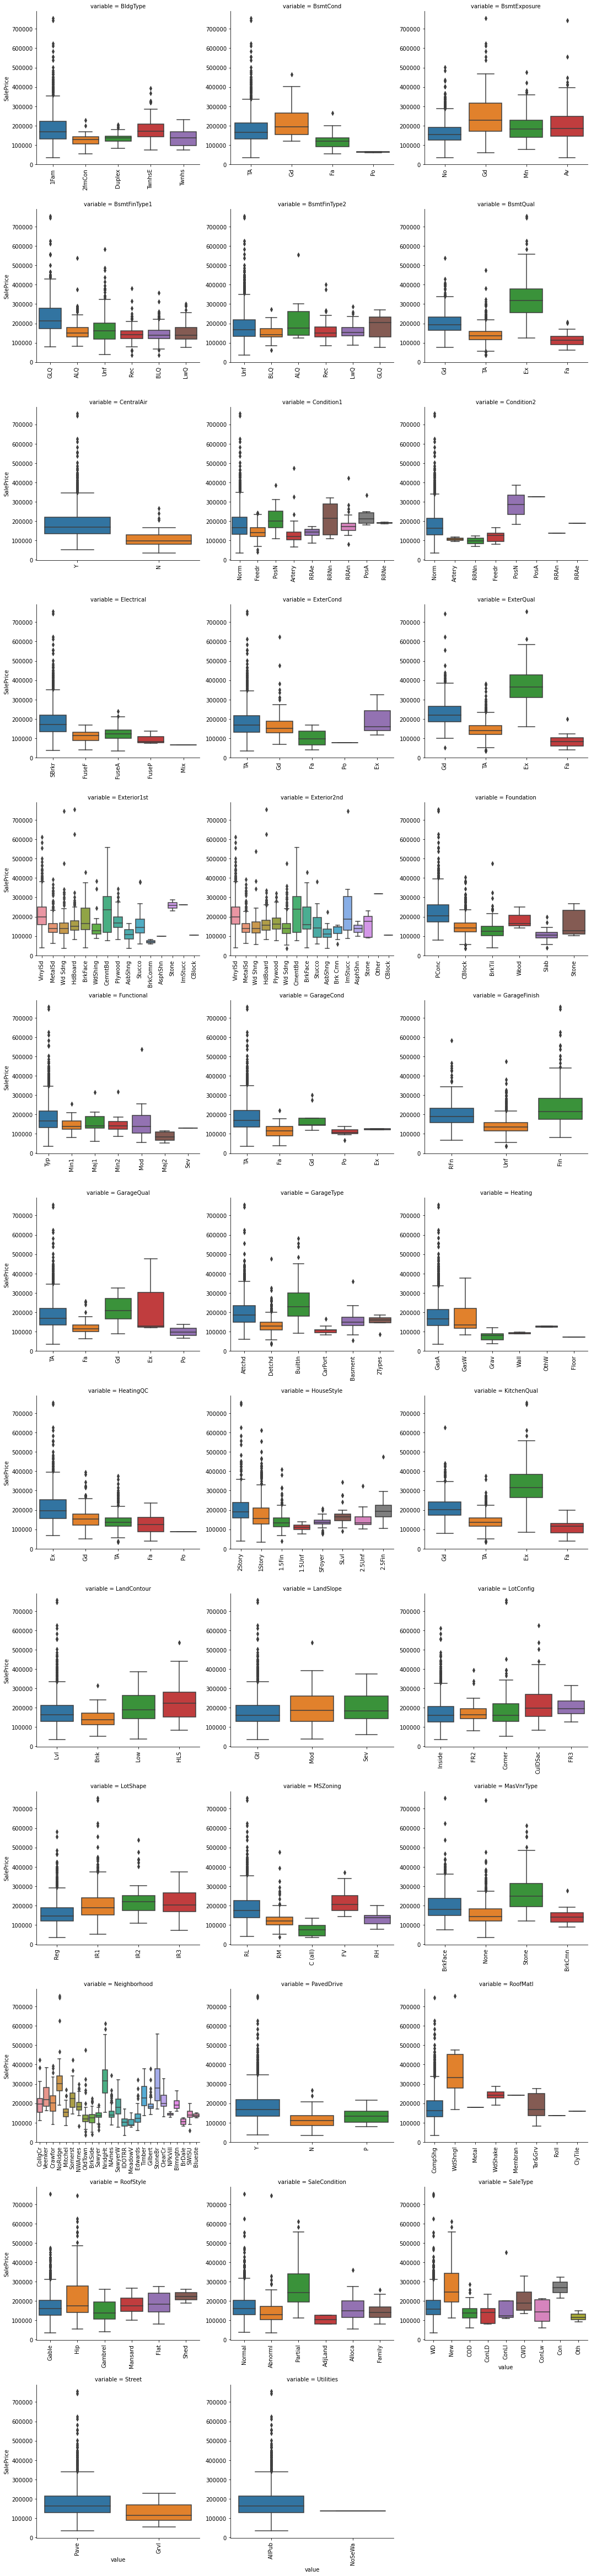

In [182]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = h_p.select_dtypes(exclude=['int64','float64'])
f = pd.melt(h_p, id_vars=['SalePrice'], value_vars=sorted(h_p[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

There are outliers in the desing, those will be taken care by later part in the code:
Interpretation from above plots are:
- Paved Drive RL demand higer price
- Saletype warranty deed demand high price
- Utilities partial demand high price
- Garage in current building demand high price

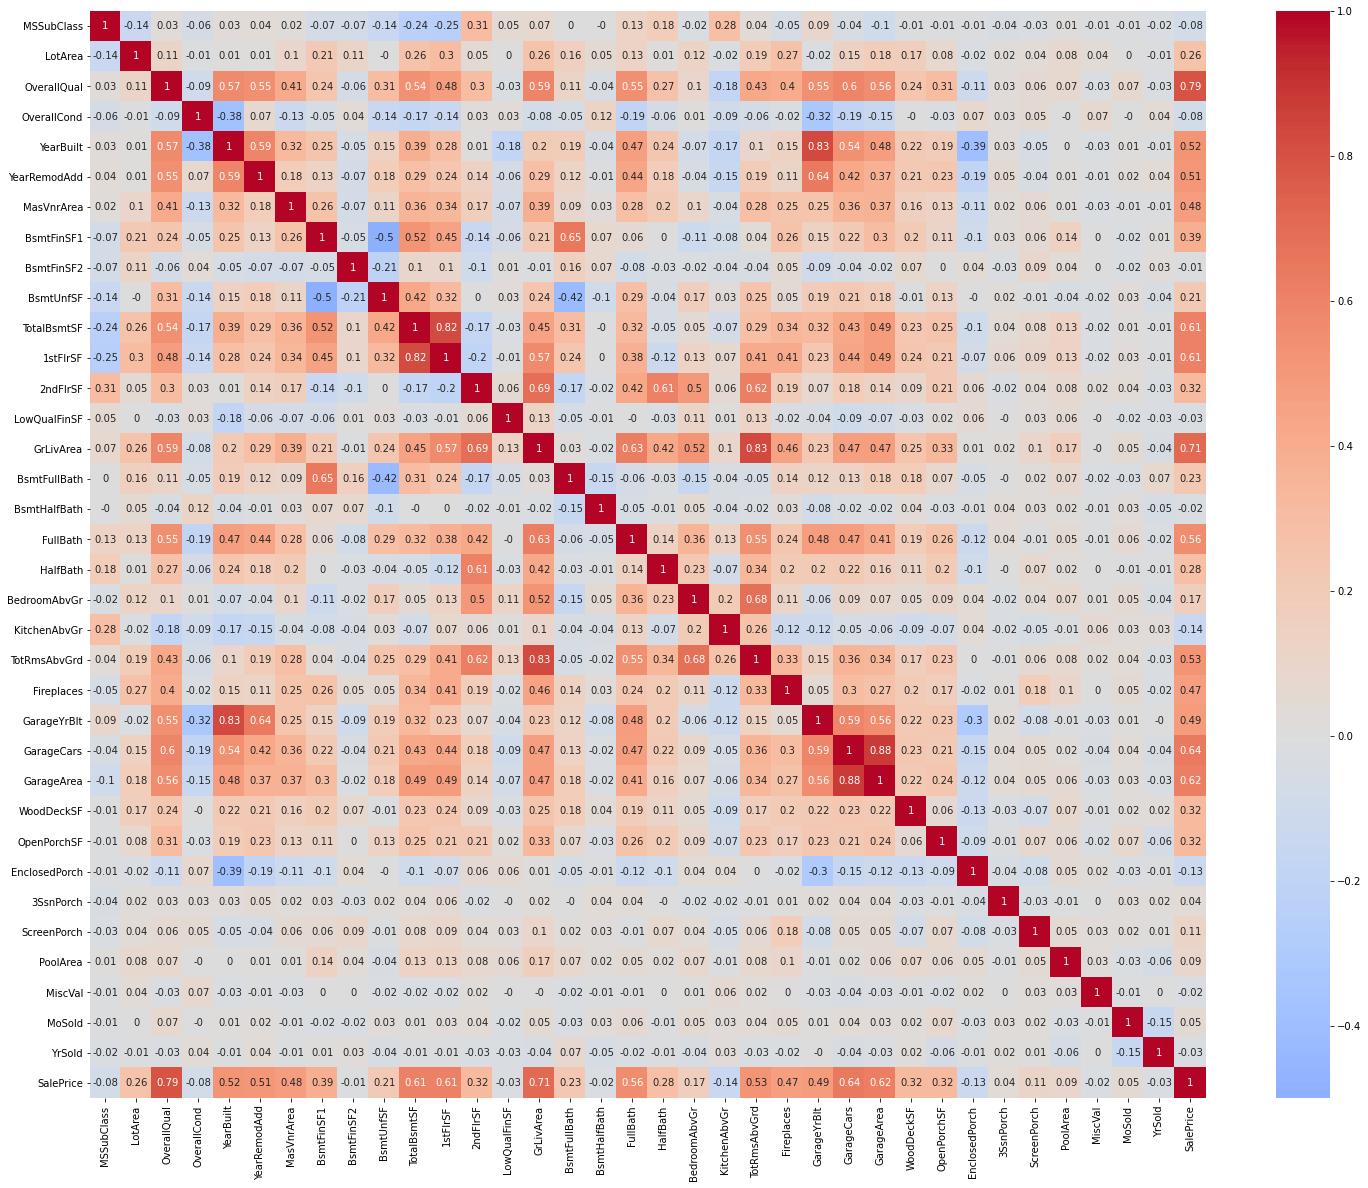

In [183]:
#Deriving numerical values to check the correlation between each features
h_p_num = h_p.select_dtypes(include=['int64','float64'])
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(h_p_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

There are correlated features, these will be removed lateer in the code

## Data Preparation and Data Cleaning

In [184]:
#Creating derived variables
h_p['YearBuilt_Old'] = h_p.YearBuilt.max()-h_p.YearBuilt
h_p['YearRemodAdd_Old'] = h_p.YearRemodAdd.max()-h_p.YearRemodAdd
h_p['GarageYrBlt_Old'] = h_p.GarageYrBlt.max()-h_p.GarageYrBlt
h_p['YrSold_Old'] = h_p.YrSold.max()-h_p.YrSold
h_p[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
580,1960,1987,1960.0,2007,50,23,50.0,3
13,2006,2007,2006.0,2007,4,3,4.0,3
283,2008,2009,2008.0,2009,2,1,2.0,1
1210,1992,1992,1992.0,2010,18,18,18.0,0
1057,1994,1994,1994.0,2009,16,16,16.0,1
591,2008,2008,2008.0,2009,2,2,2.0,1
1174,1932,1950,1932.0,2006,78,60,78.0,4
909,2005,2005,2005.0,2009,5,5,5.0,1
396,1972,1972,1985.0,2009,38,38,25.0,1
1267,2008,2009,2009.0,2010,2,1,1.0,0


In [185]:
#dropping actual variables as new variables are derived from these
h_p = h_p.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [186]:
#Adding values to missing values
#Houses that don't have garage are placed with -1

h_p.MasVnrType.fillna('None',inplace=True)
h_p.MasVnrArea.fillna(h_p.MasVnrArea.mean(),inplace=True)
h_p.BsmtQual.fillna('TA',inplace=True)
h_p.BsmtCond.fillna('TA',inplace=True)
h_p.BsmtExposure.fillna('No',inplace=True)
h_p.BsmtFinType1.fillna('Unf',inplace=True)
h_p.BsmtFinType2.fillna('Unf',inplace=True)
h_p.GarageType.fillna('Attchd',inplace=True)
h_p.GarageYrBlt_Old.fillna(-1,inplace=True)
h_p.GarageFinish.fillna('Unf',inplace=True)
h_p.GarageQual.fillna('TA',inplace=True)
h_p.GarageCond.fillna('TA',inplace=True)

In [187]:
#As per the analysis 'Street' & 'Utilities' has no impact on house sale price hence dropping these
h_p.Street.value_counts()
h_p.Utilities.value_counts()
h_p = h_p.drop(['Street','Utilities'],axis='columns')

In [188]:
h_p.shape

(1460, 72)

Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively

In [189]:
num_col = list(h_p.dtypes[h_p.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

h_p = drop_outliers(h_p)

In [190]:
h_p.shape

(1441, 72)

In [191]:
h_p[list(h_p.dtypes[h_p.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [192]:
#Converting numerical variables to categorical as these are categorical looking at data description
h_p['LandSlope'] = h_p.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
h_p['ExterQual'] = h_p.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
h_p['BsmtQual'] = h_p.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
h_p['BsmtCond'] = h_p.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
h_p['BsmtExposure'] = h_p.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
h_p['BsmtFinType1'] = h_p.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
h_p['BsmtFinType2'] = h_p.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
h_p['HeatingQC'] = h_p.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
h_p['CentralAir'] = h_p.CentralAir.map({'N':0,'Y':1})
h_p['KitchenQual'] = h_p.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
h_p['GarageFinish'] = h_p.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
h_p['GarageQual'] = h_p.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
h_p['GarageCond'] = h_p.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
h_p['ExterCond'] = h_p.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
h_p['LotShape'] = h_p.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [193]:
h_p.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,8450,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,3,8,Typ,0,Attchd,2,2,548,3,3,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,Attchd,2,2,460,3,3,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,3,6,Typ,1,Attchd,2,2,608,3,3,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,3,7,Typ,1,Detchd,1,3,642,3,3,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3,9,Typ,1,Attchd,2,3,836,3,3,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,10,10,10.0,2


Creating dummy variables and joining these with the actual dataset and dropping of the variables from which dummies are created

In [194]:
dummy_col = pd.get_dummies(h_p[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

h_p = pd.concat([h_p,dummy_col],axis='columns')

h_p = h_p.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

Let us check the distribution of our target variable before scaling and Splitting

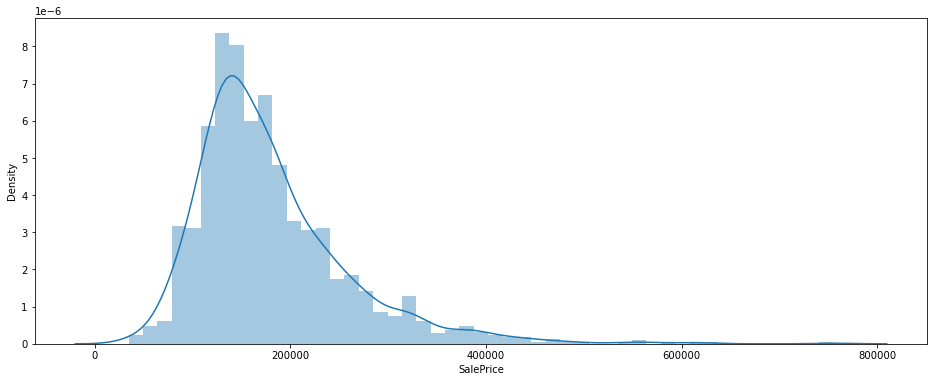

In [195]:
plt.figure(figsize=(16,6))
sns.distplot(h_p.SalePrice)
plt.show()

## Model Building and Evaluation

In [196]:
# Creating train and test split
df_train,df_test = train_test_split(h_p,train_size=0.7,test_size=0.3,random_state=42)


In [197]:
h_p[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Scaling the train dataset

Note as scale of our dependent valriable SalePrice is very different with the independent variable i am scaling the dependent variable

In [198]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

Lets check the distribution again after scaling

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

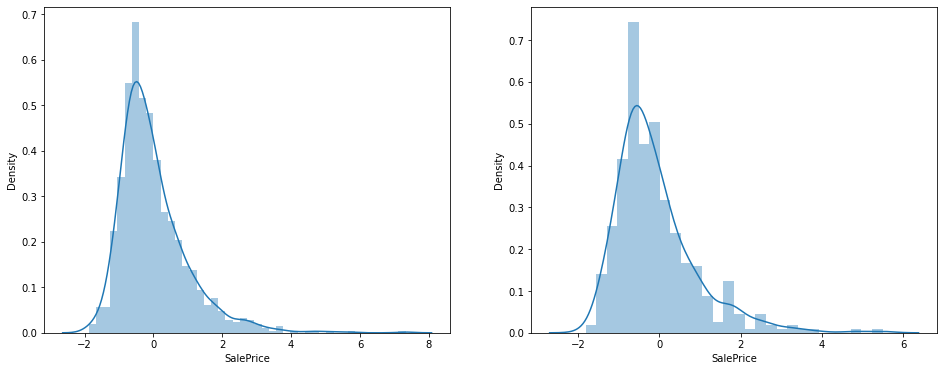

In [199]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

Spliting the target and dependent variable

In [200]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [201]:
y_test = df_test.pop('SalePrice')
X_test = df_test

Now using RFE lets try to to find the optimal number of feature

In [202]:
len(X_train.columns)

193

As there are many features GridsearchCV with RFE may take time, so using RFE directly

In [203]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [204]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_scores

,Column_Names,Status,Rank
0,MSSubClass,True,1
1,LotArea,False,50
2,LotShape,False,70
3,LandSlope,False,78
4,OverallQual,True,1
5,OverallCond,False,36
6,MasVnrArea,False,6
7,ExterQual,True,1
8,ExterCond,False,105
9,BsmtQual,False,7


In [205]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [206]:
rfe_sel_columns

['MSSubClass',
 'OverallQual',
 'ExterQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenQual',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Low',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_RRAe',
 'Condition2_PosN',
 'BldgType_2fmCon',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SLvl',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exter

Lets filter the train and test set for the RFE selected columns

In [207]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

#### Linear regression

In [208]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
X_train_new = X_train[rfe_sel_columns]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     123.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:10:14   Log-Likelihood:                -286.94
No. Observations:                1008   AIC:                             707.9
Df Residuals:                     941   BIC:                             1037.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.9040      0.162     -5.591      0.000      -1.221      -0.587
MSSubClass               -0.1701      0.017    -10.305      0.000      -0.203      -0.138
OverallQual               0.1958      0.021      9.552      0.000       0.156       0.236
ExterQual                 0.1652      0.034      4.853      0.000       0.098       0.232
BsmtFinSF1                0.1369      0.010     14.320      0.000       0.118       0.156
BsmtFinSF2                0.0257      0.011      2.361      0.018       0.004       0.047
BsmtUnfSF                -0.0376      0.009     -4.060      0.000      -0.056      -0.019
TotalBsmtSF               0.1143      0.014      7.947      0.000       0.086       0.143
1stFlrSF                  0.1091      0.016      6.945      0.000       0.078       0.140
2ndFlrSF                  0.1810      0.010     17.581      0.000       0.161       0.201
LowQualFinSF             -0.0008      0.016     -0.051      0.960      -0.032       0.030
GrLivArea                 0.2327      0.009     25.097      0.000       0.215       0.251
KitchenQual               0.1308      0.027      4.866      0.000       0.078       0.184
MSZoning_FV               0.2454      0.185      1.326      0.185      -0.118       0.609
MSZoning_RH               0.1252      0.193      0.649      0.516      -0.253       0.504
MSZoning_RL               0.2900      0.156      1.862      0.063      -0.016       0.596
MSZoning_RM               0.2178      0.148      1.472      0.141      -0.073       0.508
LandContour_Low          -0.1446      0.083     -1.745      0.081      -0.307       0.018
LotConfig_CulDSac         0.2067      0.046      4.507      0.000       0.117       0.297
Neighborhood_BrkSide     -0.2719      0.072     -3.774      0.000      -0.413      -0.131
Neighborhood_ClearCr     -0.2555      0.091     -2.792      0.005      -0.435      -0.076
Neighborhood_CollgCr     -0.2893      0.050     -5.776      0.000      -0.388      -0.191
Neighborhood_Edwards     -0.4395      0.059     -7.458      0.000      -0.555      -0.324
Neighborhood_Gilbert     -0.2745      0.061     -4.491      0.000      -0.394      -0.155
Neighborhood_IDOTRR      -0.3518      0.092     -3.809      0.000      -0.533      -0.171
Neighborhood_Mitchel     -0.3318      0.071     -4.653      0.000      -0.472      -0.192
Neighborhood_NAmes       -0.4555      0.051     -9.020      0.000      -0.555      -0.356
Neighborhood_NWAmes      -0.4052      0.064     -6.334      0.000      -0.531      -0.280
Neighborhood_NridgHt      0.3509      0.064      5.503      0.000       0.226       0.476
Neighborhood_OldTown     -0.4394      0.070     -6.262      0.000      -0.577      -0.302
Neighborhood_SWISU       -0.4231      0.098     -4.337      0.000      -0.615      -0.232
Neighborhood_Sawyer    

### Ridge Regression

In [209]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8965388636403444
0.8336086722351578


**As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score**


Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [210]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

folds = 5

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#hyper_param = {'alpha':[0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [212]:
#Seeing the alpha values in dataframe
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004262,0.003156,0.001536,0.000444,0.01,{'alpha': 0.01},0.861931,0.758910,0.741775,0.850780,0.915100,0.825699,0.065480,6,0.901054,0.908347,0.909265,0.900738,0.884870,0.900855,0.008746
1,0.002298,0.000053,0.001184,0.000034,0.10,{'alpha': 0.1},0.863495,0.782501,0.741323,0.851943,0.913942,0.830641,0.061266,5,0.900933,0.908011,0.909153,0.900653,0.884761,0.900702,0.008707
2,0.002330,0.000153,0.001182,0.000016,1.00,{'alpha': 1.0},0.867982,0.861777,0.729815,0.858200,0.905082,0.844571,0.059767,1,0.896462,0.898521,0.906205,0.896844,0.880698,0.895746,0.008309
3,0.003208,0.000787,0.001468,0.000307,5.00,{'alpha': 5.0},0.864596,0.884503,0.710155,0.859994,0.889462,0.841742,0.066747,2,0.880514,0.876888,0.897316,0.881365,0.867136,0.880644,0.009748
4,0.002530,0.000315,0.001228,0.000118,10.00,{'alpha': 10.0},0.860224,0.882365,0.703976,0.857986,0.883145,0.837539,0.067618,3,0.871287,0.867045,0.891800,0.872256,0.859421,0.872362,0.010721


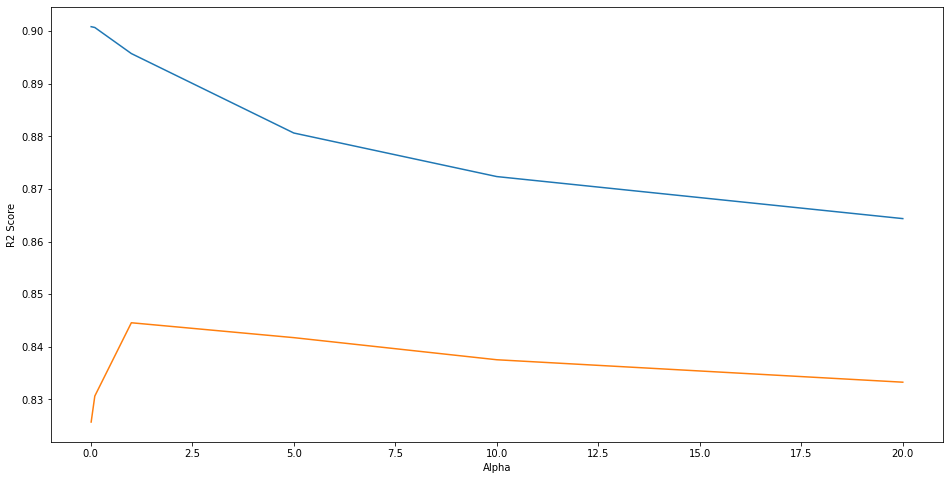

In [213]:
#Plotting mean tarin and test score with hyper parameter
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [214]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

With best value of alpha, bulding the model

In [215]:
#r2_score with train and test
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8930600956297683
0.8471373324280245


In [216]:
#Checking model features and the coefficients 
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(20)

,Feaure,Coef
48,GarageYrBlt_Old,1.446287
67,Neighborhood_Edwards,0.527408
28,BedroomAbvGr,0.366771
39,OpenPorchSF,0.339803
44,MiscVal,0.307563
68,Neighborhood_Gilbert,0.283732
64,Neighborhood_ClearCr,0.264883
58,LotConfig_FR2,0.233180
11,BsmtExposure,0.228184
43,PoolArea,0.225377


### Lasso Regression

In [217]:
#Inital lasso model with alpha - 0.002
lasso_lm = Lasso(alpha=0.002)
lasso_lm.fit(X_train,y_train)

y_train_pred = lasso_lm.predict(X_train)
print('Lasso: The train r2_score = ', r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lasso_lm.predict(X_test)
print('Lasso: The test r2_score = ', r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso: The train r2_score =  0.8796735727693754
Lasso: The test r2_score =  0.849909803221252


**As we can see the above alpha value is not optimal for lasso there are sign of overfitting the clear difference we can see in the train and test score**


Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [218]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

folds = 5

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}



model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [219]:
# looking at the dataframe with alphas
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006518,0.001963,0.001793,0.000346,0.01,{'alpha': 0.01},0.832105,0.859823,0.695859,0.836204,0.858135,0.816425,0.061313,1,0.839203,0.836173,0.867072,0.841108,0.828468,0.842405,0.013065
1,0.002491,0.000164,0.001201,0.000042,0.10,{'alpha': 0.1},0.764812,0.800432,0.726562,0.780350,0.764019,0.767235,0.024268,2,0.783437,0.779286,0.802522,0.776317,0.761975,0.780707,0.013081
2,0.002158,0.000022,0.001251,0.000164,1.00,{'alpha': 1.0},-0.006944,-0.004372,-0.003554,-0.000091,-0.026921,-0.008377,0.009528,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.002406,0.000232,0.001721,0.000459,5.00,{'alpha': 5.0},-0.006944,-0.004372,-0.003554,-0.000091,-0.026921,-0.008377,0.009528,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002625,0.000406,0.001555,0.000599,10.00,{'alpha': 10.0},-0.006944,-0.004372,-0.003554,-0.000091,-0.026921,-0.008377,0.009528,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


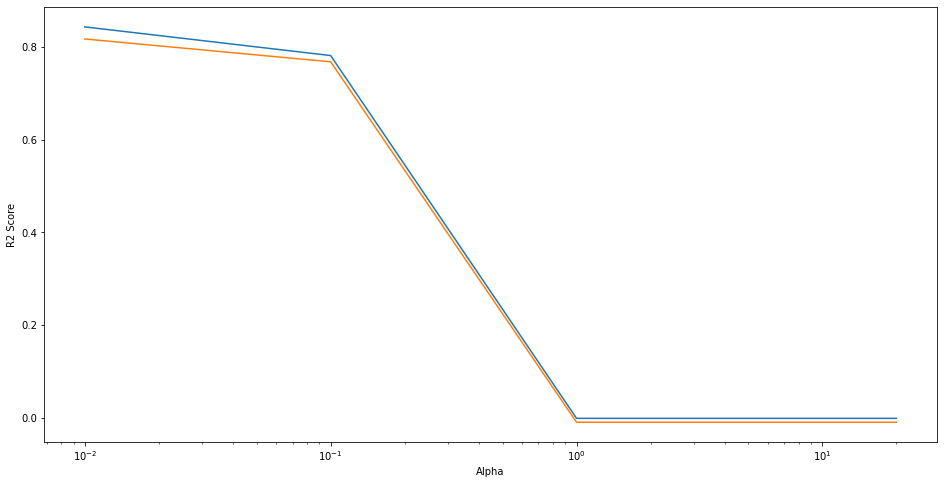

In [220]:
#Plotting mean train and test scores with hyper parameter
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [221]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.01}

In [224]:
#applying the best hyper parameter to the Lasso model and checking the r2_score
lasso_update = Lasso(alpha=0.01)
lasso_update.fit(X_train,y_train)

y_train_pred = lasso_update.predict(X_train)
print('Lasso: The train r2_score = ', r2_score(y_true=y_train,y_pred=y_train_pred))


y_test_pred = lasso_update.predict(X_test)
print('Lasso: The test r2_score = ', r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso: The train r2_score =  0.8407890574767285
Lasso: The test r2_score =  0.8432066638229836


In [225]:
#Checking model features and the coefficients 
model_param = list(lasso_update.coef_)
model_param.insert(0,lasso_update.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(20)

,Featuere,Coef
11,BsmtExposure,0.372912
2,LotShape,0.298197
28,BedroomAbvGr,0.209535
3,LandSlope,0.203240
4,OverallQual,0.172750
12,BsmtFinType1,0.166694
67,Neighborhood_Edwards,0.107684
7,ExterQual,0.071863
18,HeatingQC,0.056436
62,Neighborhood_BrDale,0.054446


### Lets us see the changes coefficients after regularization



In [123]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [124]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso_update.coef_

Comparing the coefficients between both Ridge and Lasso

In [226]:
pd.set_option('display.max_rows', None)
betas.sort_values(by='Lasso',ascending=False).head(68)

,Ridge,Lasso
GrLivArea,0.228184,0.372912
OverallQual,0.207289,0.298197
Neighborhood_NridgHt,0.366771,0.209535
ExterQual,0.169510,0.203240
BsmtFinSF1,0.133323,0.172750
KitchenQual,0.135432,0.166694
SaleType_New,0.527408,0.107684
TotalBsmtSF,0.108843,0.071863
LotConfig_CulDSac,0.211933,0.056436
Functional_Typ,0.189965,0.054446


In [227]:
betas.sort_values(by='Ridge',ascending=False).head(68)

,Ridge,Lasso
RoofMatl_WdShngl,1.446287,0.000000
SaleType_New,0.527408,0.107684
Neighborhood_NridgHt,0.366771,0.209535
BldgType_2fmCon,0.339803,0.000000
RoofMatl_Membran,0.307563,0.000000
SaleType_Oth,0.283732,0.000000
SaleType_ConLD,0.264883,0.000000
Heating_Wall,0.233180,0.000000
GrLivArea,0.228184,0.372912
RoofStyle_Shed,0.225377,0.000000


### Final Summary

Best Lambda value in both Ridge and Lasso is as below:
- Ridge 1.0
- Lasso: 0.01

R2_score in Ridge and Lasso is as below:
- Ridge:
    * rain: 0.89
    * Test: 0.84
- Lasso:
    * Train: 0.84
    * Test: 0.84

Significant Variable in Ridge are:
1. RoofMatl_WdShngl
2. SaleType_New
3. Neighborhood_NridgHt
4. BldgType_2fmCon
5. RoofMatl_Membran

Significant Variable in Lasso are:
1. GrLivArea
2. OverallQual
3. Neighborhood_NridgHt
4. ExterQual
5. BsmtFinSF1

### Part 2 - Subjective Questions - Demonstartion for Q1 and Q3
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


Ans: 
- The alpha values for ridge is 1.0 and alpha value for lasso is 0.01
- After doubling alpha, the alpha for ridge is 2 and for lasso it is 0.02.

In [228]:
lasso_c2 = Lasso(alpha=0.02)
lasso_c2.fit(X_train,y_train)

y_train_pred = lasso_c2.predict(X_train)
print('Lasso: The train r2_score = ', r2_score(y_true=y_train,y_pred=y_train_pred))


y_test_pred = lasso_c2.predict(X_test)
print('Lasso: The test r2_score = ', r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso: The train r2_score =  0.8272263655141374
Lasso: The test r2_score =  0.830291170407382


In [229]:
model_param = list(lasso_c2.coef_)
model_param.insert(0,lasso_c2.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Featuere,Coef
11,BsmtExposure,0.356736
2,LotShape,0.320690
3,LandSlope,0.200336
12,BsmtFinType1,0.171100
4,OverallQual,0.167143


When the alpha value is doubled in Lasso. The test r2 score is more than train and the top 5 significant features changed.

Before when alpha is 0.01, then the features were:
1. GrLivArea
2. OverallQual
3. Neighborhood_NridgHt
4. ExterQual
5. BsmtFinSF1

In [230]:
ridge_c2 = Ridge(alpha = 2.0)
ridge_c2.fit(X_train,y_train)

y_pred_train = ridge_c2.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge_c2.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.88892282397757
0.8525967855457075


In [231]:
model_parameter = list(ridge_c2.coef_)
model_parameter.insert(0,ridge_c2.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(5)

,Feaure,Coef
48,GarageYrBlt_Old,1.177924
67,Neighborhood_Edwards,0.397204
28,BedroomAbvGr,0.371571
39,OpenPorchSF,0.296221
11,BsmtExposure,0.226347


When the alpha value is doubled in Ridge the difference between r2 score of test and train is better than when alpha is 1.0
And the 5 significant features changed as compared to when the alpha was 1.0
1. RoofMatl_WdShngl
2. SaleType_New
3. Neighborhood_NridgHt
4. BldgType_2fmCon
5. RoofMatl_Membran

Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Ans:

The 5 most important features for Lasso are:
1. GrLivArea
2. OverallQual
3. Neighborhood_NridgHt
4. ExterQual
5. BsmtFinSF1

In [232]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_c3 = X_test.drop(['GrLivArea', 'OverallQual', 'Neighborhood_NridgHt', 'ExterQual', 'BsmtFinSF1'],axis=1)
X_train_c3 = X_train.drop(['GrLivArea', 'OverallQual', 'Neighborhood_NridgHt', 'ExterQual', 'BsmtFinSF1'],axis=1)

# Building Lasso Model with the new dataset
lasso_c3 = Lasso(alpha=0.01)
lasso_c3.fit(X_train_c3,y_train)

y_train_pred = lasso_c3.predict(X_train_c3)
print('Lasso: The train r2_score = ', r2_score(y_true=y_train,y_pred=y_train_pred))


y_test_pred = lasso_c3.predict(X_test_c3)
print('Lasso: The test r2_score = ', r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso: The train r2_score =  0.7990207080760099
Lasso: The test r2_score =  0.7960763689724174


In [233]:
model_param = list(lasso_c3.coef_)
model_param.insert(0,lasso_c3.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Featuere,Coef
8,ExterCond,0.454309
6,MasVnrArea,0.410821
4,OverallQual,0.333556
5,OverallCond,0.308958
62,Neighborhood_BrDale,0.247122
